# EXERCICE 2 : ACP Complète
 
**Objectif** : Réaliser une ACP complète sur un nouveau dataset
 
**Contexte** : Vous êtes data analyst dans une entreprise de télécommunications. Vous devez analyser les profils de clients pour identifier des segments.
 
**Consignes** :
 
1. Normalisez les données
2. Appliquez une ACP
3. Analysez la variance expliquée et créez un scree plot
4. Déterminez combien de composantes garder (objectif : 85% de variance)
5. Interprétez les 2 premières composantes (loadings)
6. Créez une visualisation PC1 vs PC2

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Génération des données

In [22]:
np.random.seed(456)
n_clients_telecom = 600
 
anciennete = np.random.uniform(1, 120, n_clients_telecom)  # mois
facture_mensuelle = 30 + anciennete * 0.3 + np.random.normal(0, 15, n_clients_telecom)
facture_mensuelle = np.clip(facture_mensuelle, 20, 150)
 
data_usage = 5 + (facture_mensuelle / 10) + np.random.normal(0, 3, n_clients_telecom)
data_usage = np.clip(data_usage, 1, 50)
 
nb_appels_support = 10 - (anciennete / 20) + np.random.poisson(2, n_clients_telecom)
nb_appels_support = np.clip(nb_appels_support, 0, 20)
 
score_satisfaction = 3.5 + (anciennete / 100) - (nb_appels_support / 20) + np.random.normal(0, 0.5, n_clients_telecom)
score_satisfaction = np.clip(score_satisfaction, 1, 5)
 
nb_services = np.random.poisson(3, n_clients_telecom)
nb_services = np.clip(nb_services, 1, 7)
 
taux_paiement_retard = 0.1 - (score_satisfaction / 100) + np.random.normal(0, 0.05, n_clients_telecom)
taux_paiement_retard = np.clip(taux_paiement_retard, 0, 0.5)
 
df_telecom = pd.DataFrame({
    'anciennete_mois': anciennete.round(0),
    'facture_mensuelle': facture_mensuelle.round(2),
    'data_usage_gb': data_usage.round(1),
    'nb_appels_support': nb_appels_support,
    'score_satisfaction': score_satisfaction.round(1),
    'nb_services_actifs': nb_services,
    'taux_paiement_retard': taux_paiement_retard.round(3)
})
 
print("Dataset Télécommunications chargé !")
print(f"Dimensions : {df_telecom.shape}")
print("\nAperçu :")
df_telecom.head()

Dataset Télécommunications chargé !
Dimensions : (600, 7)

Aperçu :


,anciennete_mois,facture_mensuelle,data_usage_gb,nb_appels_support,score_satisfaction,nb_services_actifs,taux_paiement_retard
0,31.0,82.20,16.2,9.469902,3.4,2,0.084
1,20.0,36.62,11.5,9.979753,3.1,4,0.121
2,94.0,53.87,11.9,7.287323,4.1,1,0.070
3,97.0,33.57,6.4,7.139286,2.9,2,0.187
4,75.0,46.62,11.2,7.227511,4.9,3,0.074


## Normalisation des données

In [23]:
scaler = StandardScaler()

df_normalized = pd.DataFrame(
    scaler.fit_transform(df_telecom),
    columns=df_telecom.columns,
)

df_normalized.head()

,anciennete_mois,facture_mensuelle,data_usage_gb,nb_appels_support,score_satisfaction,nb_services_actifs,taux_paiement_retard
0,-0.872115,1.993848,1.806859,0.261625,-0.379400,-0.659110,0.382093
1,-1.194451,-0.693436,0.457564,0.506706,-0.838970,0.584494,1.200626
2,0.973992,0.323581,0.572398,-0.787523,0.692929,-1.280912,0.072377
3,1.061902,-0.873256,-1.006565,-0.858684,-1.145350,-0.659110,2.660712
4,0.417230,-0.103861,0.371439,-0.816275,1.918448,-0.037308,0.160868


## ACP

In [24]:
pca = PCA()

components = pca.fit_transform(df_normalized)

## Analyse variance expliquée

In [25]:
explained_variance = pca.explained_variance_ratio_
total_variance = np.cumsum(explained_variance)

df_variance = pd.DataFrame({
    "Composante" : [f"PC{i+1}" for i in range(len(explained_variance))],
    "Variance expliquée (%)" : (explained_variance * 100).round(2),
    "Variance cumulée (%)" : (total_variance * 100).round(2),
})

df_variance.head(10)

,Composante,Variance expliquée (%),Variance cumulée (%)
0,PC1,41.64,41.64
1,PC2,15.65,57.29
2,PC3,14.49,71.78
3,PC4,12.72,84.50
4,PC5,6.86,91.36
5,PC6,5.44,96.80
6,PC7,3.20,100.00


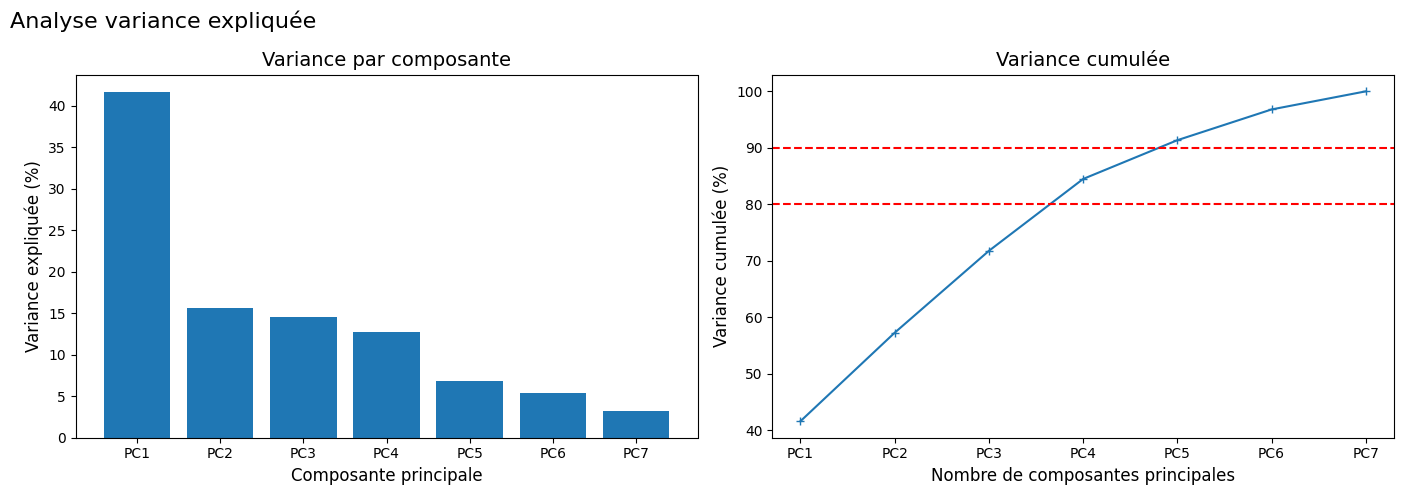

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
plt.suptitle("Analyse variance expliquée", fontsize=16, x=0.11)

axes[0].bar(df_variance["Composante"], explained_variance * 100)
axes[0].set_xlabel("Composante principale", fontsize=12)
axes[0].set_ylabel("Variance expliquée (%)", fontsize=12)
axes[0].set_title("Variance par composante", fontsize=14)

axes[1].plot(df_variance["Composante"], total_variance * 100, marker="+")
axes[1].axhline(y=80, color="r", linestyle="--", label="Seuil 80%")
axes[1].axhline(y=90, color="r", linestyle="--", label="Seuil 90%")
axes[1].set_xlabel("Nombre de composantes principales", fontsize=12)
axes[1].set_ylabel("Variance cumulée (%)", fontsize=12)
axes[1].set_title("Variance cumulée", fontsize=14)

plt.tight_layout()

## Nombre de composantes principales (Objectif : 85%)

Les quatres premières composantes principales représentent environ 84.50% de la variance.
Les cinq premières représentent environ 91.36% de la variance.
Pour respecter l'objectif fixé, nous garderons dans la suite de l'étude 4 coposantes principales.

## Interprétation des 4 premières composantes princiales

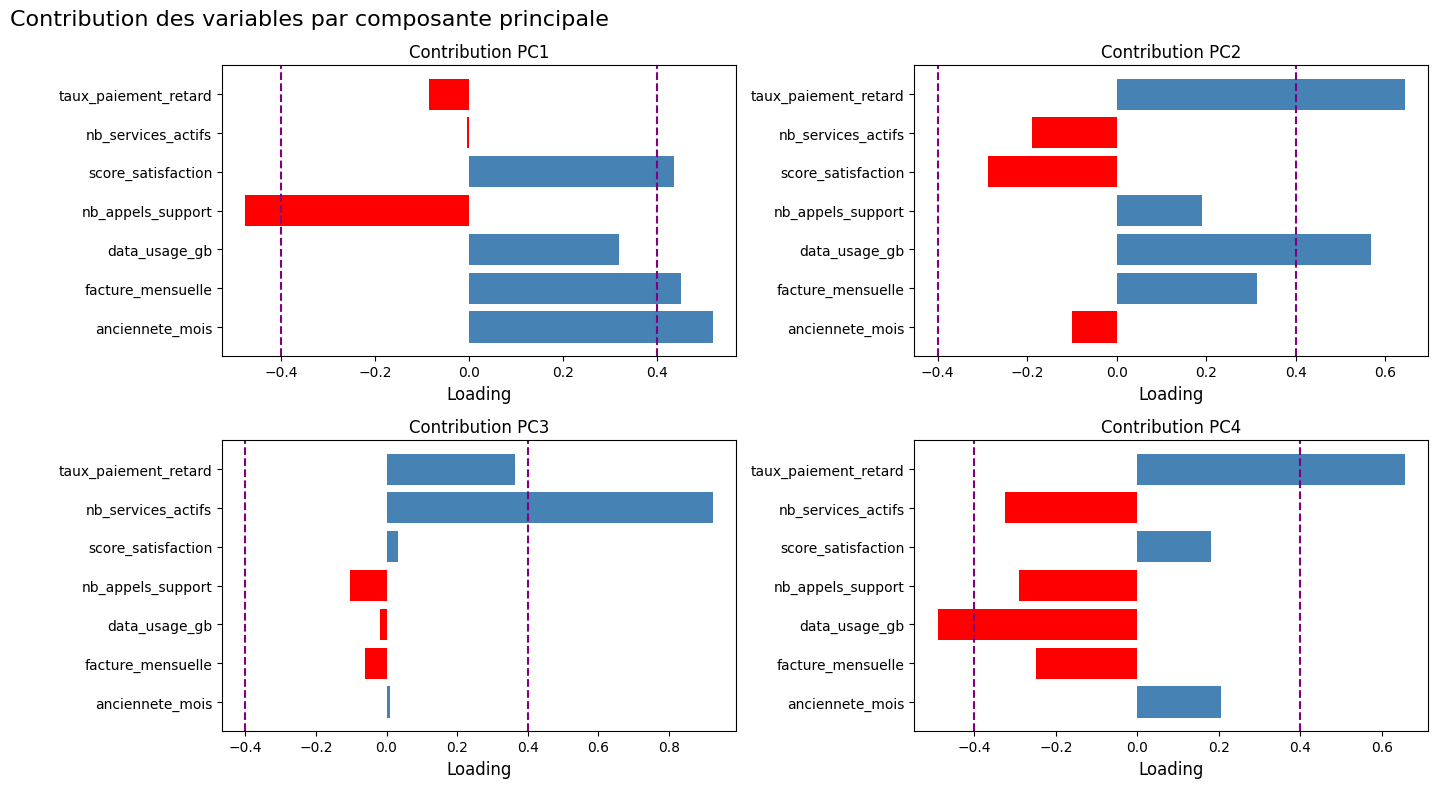

In [30]:
loadings = pca.components_

n_components = 4

df_loadings = pd.DataFrame(
    loadings[:n_components].T, # Variables mises en ligne
    columns=[f"PC{i+1}" for i in range(n_components)],
    index=df_telecom.columns,
)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
plt.suptitle("Contribution des variables par composante principale", fontsize=16, x=0.19)

# PC1
colors_pc1 = ["red" if x < 0 else "steelblue" for x in df_loadings["PC1"]]
axes[0,0].barh(df_loadings.index, df_loadings["PC1"], color=colors_pc1)
axes[0,0].axvline(x=0.4, color="purple", linestyle="--")
axes[0,0].axvline(x=-0.4, color="purple", linestyle="--")
axes[0,0].set_xlabel("Loading", fontsize=12)
axes[0,0].set_title("Contribution PC1")

# PC2
colors_pc2 = ["red" if x < 0 else "steelblue" for x in df_loadings["PC2"]]
axes[0,1].barh(df_loadings.index, df_loadings["PC2"], color=colors_pc2)
axes[0,1].axvline(x=0.4, color="purple", linestyle="--")
axes[0,1].axvline(x=-0.4, color="purple", linestyle="--")
axes[0,1].set_xlabel("Loading", fontsize=12)
axes[0,1].set_title("Contribution PC2")

# PC3
colors_pc3 = ["red" if x < 0 else "steelblue" for x in df_loadings["PC3"]]
axes[1,0].barh(df_loadings.index, df_loadings["PC3"], color=colors_pc3)
axes[1,0].axvline(x=0.4, color="purple", linestyle="--")
axes[1,0].axvline(x=-0.4, color="purple", linestyle="--")
axes[1,0].set_xlabel("Loading", fontsize=12)
axes[1,0].set_title("Contribution PC3")

# PC4
colors_pc4 = ["red" if x < 0 else "steelblue" for x in df_loadings["PC4"]]
axes[1,1].barh(df_loadings.index, df_loadings["PC4"], color=colors_pc4)
axes[1,1].axvline(x=0.4, color="purple", linestyle="--")
axes[1,1].axvline(x=-0.4, color="purple", linestyle="--")
axes[1,1].set_xlabel("Loading", fontsize=12)
axes[1,1].set_title("Contribution PC4")

plt.tight_layout()

Interprétation :
- anciennete_mois, facture_mensuelle et score_satisfaction contribuent positivement à la première composante principale
- nb_appels_support contribue négativement à la première composante principale
- taux_paiement_retard et data_usage_gb contribuent positivement à la seconde composante principale
- nb_services_actifs contribue positivement à la troisième composante principale
- taux_paiement_retard contribue positivement à la quatrième composante principale
- data_usage_gb contribue négativement à la quatrième composante principale

## Visualisation PC1 vs PC2

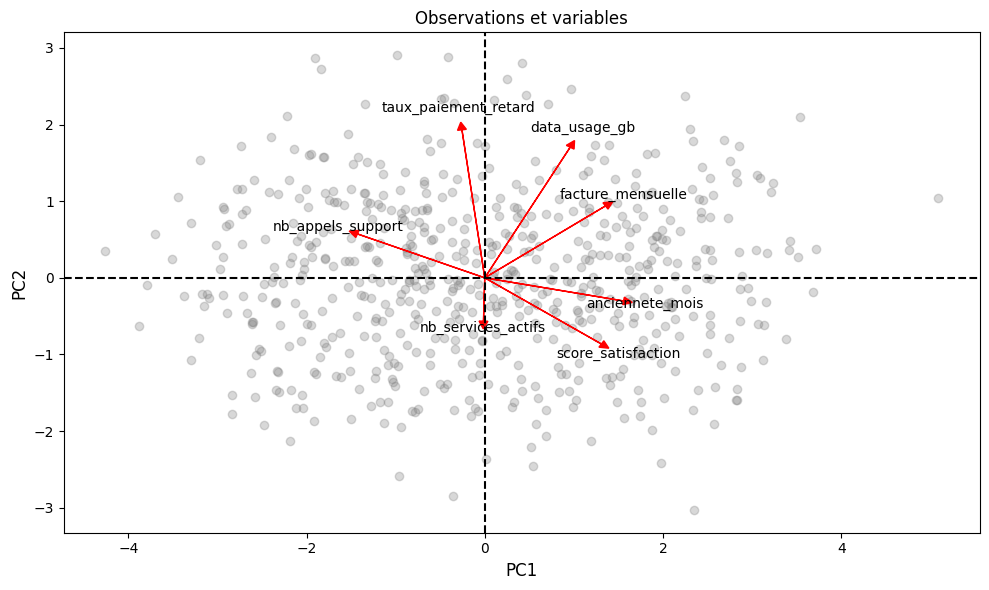

In [31]:
plt.figure(figsize=(10, 6))

plt.scatter(components[:, 0], components[:, 1], alpha=0.3, c="gray")

scale_factor = 3
for i, label in enumerate(df_telecom.columns):
    plt.arrow(
        0,0,
        loadings[0, i] * scale_factor,
        loadings[1, i] * scale_factor,
        fc="red", ec="red",
        head_length=0.1,
        head_width=0.1
    )
    plt.text(
        loadings[0, i] * scale_factor * 1.15,
        loadings[1, i] * scale_factor * 1.15,
        label,
        ha="center",
        va="center"
    )

plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.title("Observations et variables")
plt.axhline(y=0, color="k", linestyle="--")
plt.axvline(x=0, color="k", linestyle="--")

plt.tight_layout()
plt.show()

## Réduction de la dimension

In [29]:
pca_reduction = PCA(n_components)
df_reduction = pca_reduction.fit_transform(df_normalized)

df_reduction = pd.DataFrame(df_reduction, columns=[f"PC{i+1}" for i in range(n_components)])

df_reduction.head()

,PC1,PC2,PC3,PC4
0,0.705372,2.267162,-0.671688,-1.241912
1,-1.499468,1.164299,0.917512,0.003493
2,1.511900,0.266612,-1.073224,0.657580
3,-0.479235,1.051251,0.491208,2.936268
4,1.500626,-0.460942,0.173154,0.631204
